# Exercise 3

In exercise 3 of the homework sheet 4, and in exercise 2 of the homework sheet 3, we asked you to compute the difference quotient for non-uniform grids. In this exercise we want to compute discrete solutions of boundary value problems on such grids, using these results. Consider the equation:

$$
\begin{array}{c}
 -  u^{\prime \prime }(x) - 4 u^\prime(x) + u(x) = f(x), \qquad x \in \Omega := (-1,1)\\
 	u(-1) = 8 \quad \text{and} \quad u(1) = 2.
 \end{array}
$$

Assume that the exact solution $u$ and the right-hand-side $f$ are given by:

$$
u(x):= 1 + 4 x^2 - 3 x^3  \quad \text{and} \quad  f(x) := -7 -14 x + 40x^2 - 3 x^3.
$$

Furthermore, for $N\in\mathbb{N}$ we define the following grids $x=(x_0,\ldots,x_{N+1})$:
- The equidistant grid: $x_i=-1+\frac{2i}{N+1}$, for $i=0,\ldots,N+1$.
- The Chebyshev nodes:
$$
	x_i = - \cos\left( \frac{2i -1}{2N} \pi \right), \qquad \text{for} \; i = 1, \dots, N,
$$
while $x_0 = -1$ and $x_{N+1} = 1$.


## a)

#### Functions
Write a function ```get_bvp``` that takes a grid $x=(x_0,\ldots,x_{N+1})$ with

$$
	-1 = x_0 < x_1 < \ldots < x_N < x_{N+1} = 1
$$

as input, and returns the discretized boundary value problem as a tuple $(L_h, f_h)$ that uses the specified grid.
That is, the reduced discrete problem should be of the form $L_hu_h=f_h$.
Do not use loops or dense matrices!
	
<b>Hint:</b> to compute the discrete solutions, you can either use the code from exercise 3 in the homework sheet 4, or use the following finite difference quotients:

$$
		u^{\prime \prime}(x_m)  \approx \frac{2}{h_i\left( h_i + h_{i+1}\right) } u(x_{m-1}) + \frac{-2}{h_i h_{i+1}} u(x_m) + \frac{2}{h_{i+1}\left( h_i + h_{i+1} \right) } u(x_{m+1}), \\
		u^{\prime}(x_m) \approx \frac{-h_{i+1}}{h_{i}\left( h_i + h_{i+1} \right)} u(x_{m-1}) + \frac{h_{i+1} - h_i}{h_i h_{i+1}} u(x_m) + \frac{h_i}{h_{i+1}\left( h_i + h_{i+1} \right)} u(x_{m+1}).
$$
	
#### Plotting
Define the equidistant grid and the Chebyshev nodes for $N=100$.
Create a figure for each grid, and test the function ```get_bvp``` by plotting the discretized solution $u_h$ and the exact solution $u$ in the same figure. Remember to include the boundary points in the plots.

C:\Users\qqsup\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


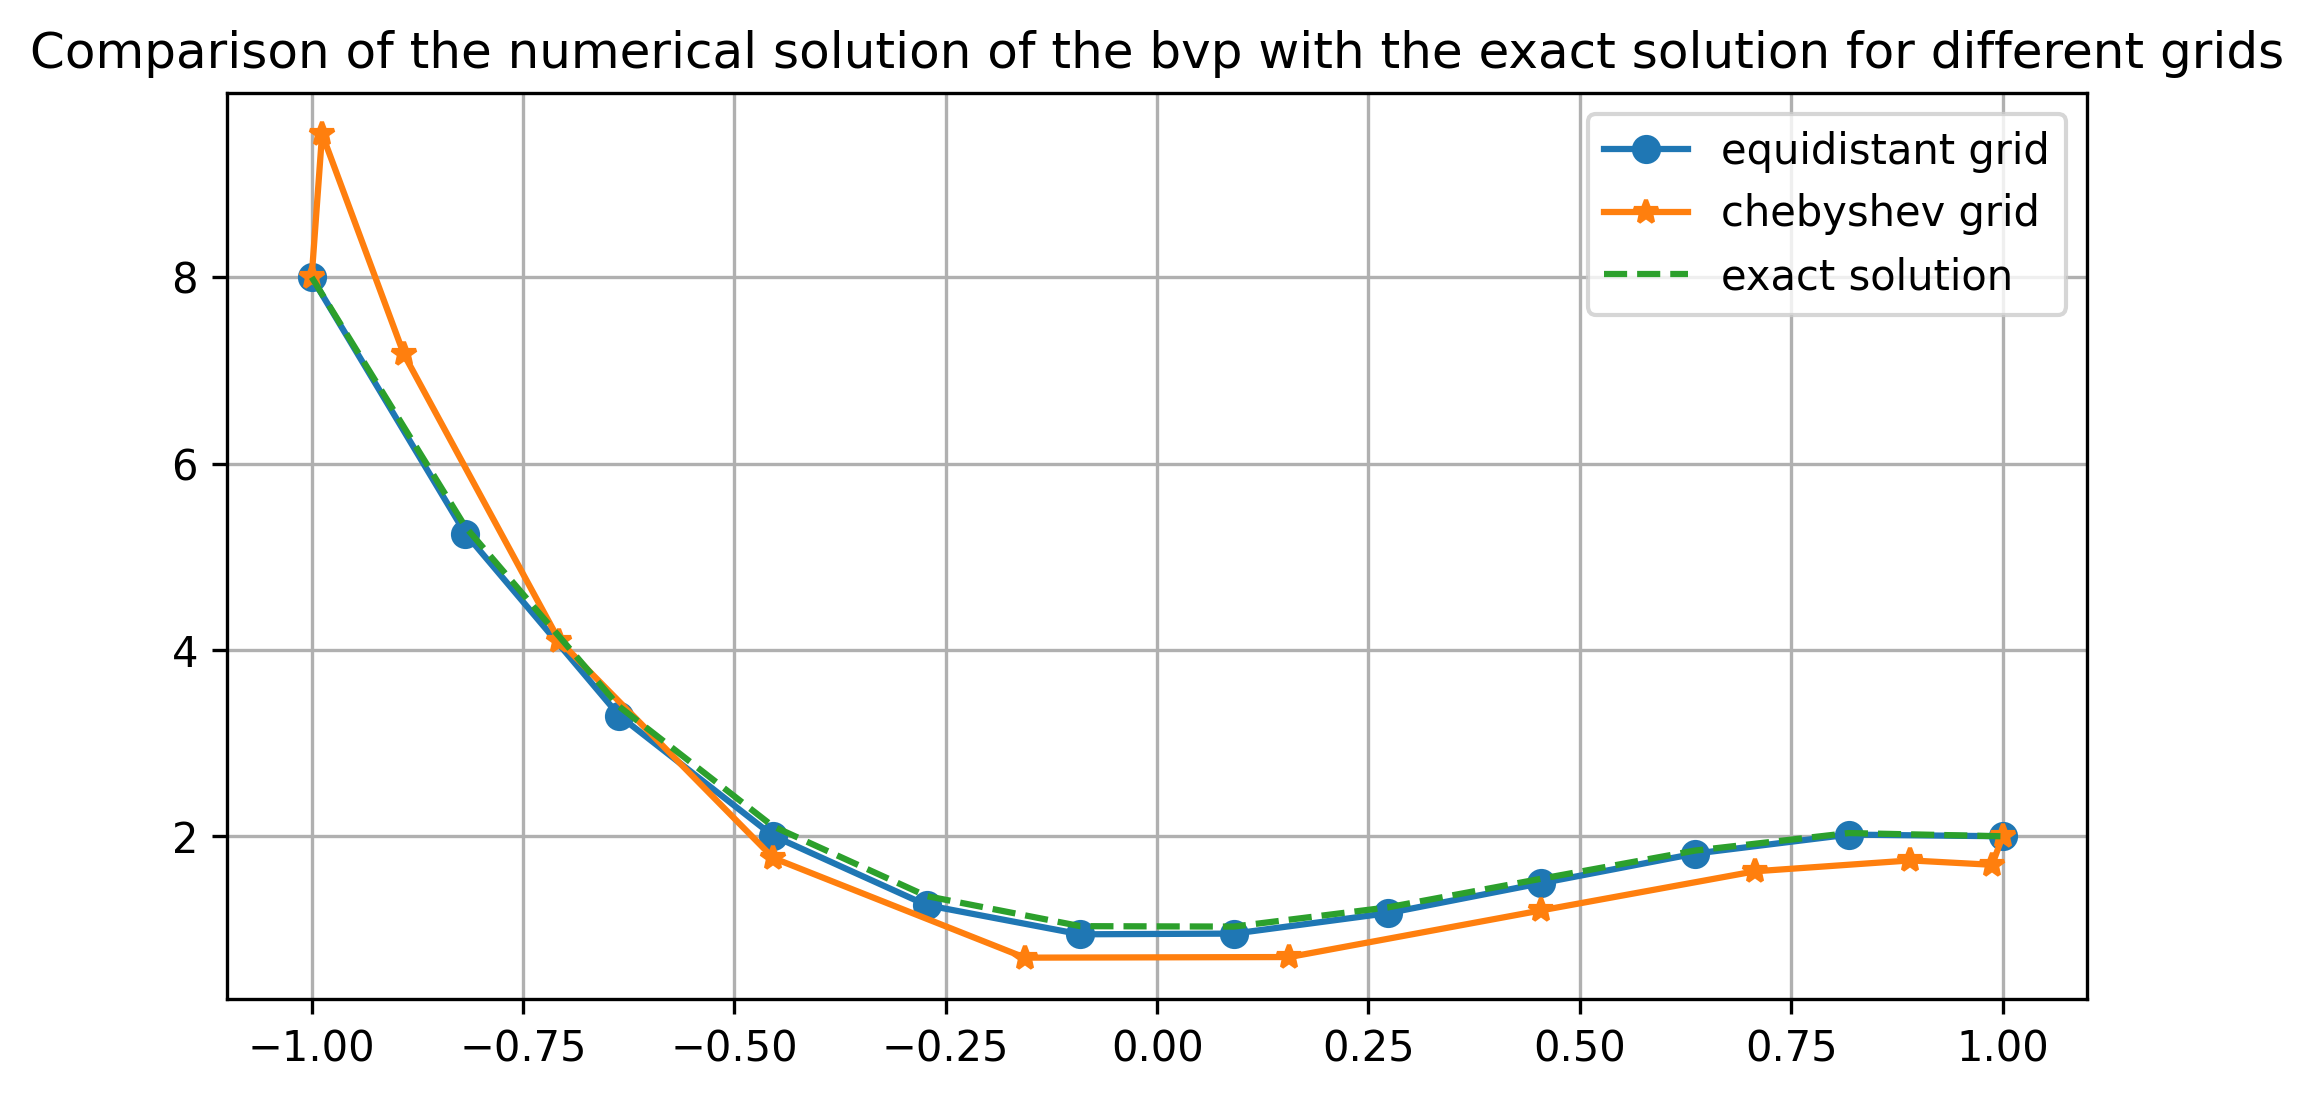

In [1]:
import numpy as np
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg

import matplotlib.pyplot as plt
N = 10
x_1 = -1 + (2*np.arange(N+2))/(N+1)

def get_chebycheff(N):
    return np.hstack((-1,-np.cos( (2*(1+np.arange(N))-1)/(2*N)*np.pi ),1))

def u(x):
    return 1 + 4 * x ** 2 - 3 * x ** 3
def f(x):
    return -7 - 14 * x + 40 * x **2 - 3 * x ** 3

def get_bvp( x , u_0 = (8,2) ):
    h_i = x[1:-1]-x[:-2]
    h_i_1 = x[2:]-x[1:-1]
    
    a_xx = 2/(h_i[1:]*(h_i_1[1:]+h_i[1:])) #lower diag for D2u
    b_xx = -2/(h_i*h_i_1) #main diag for D2u
    c_xx = 2/(h_i_1[:-1]*(h_i[:-1]+h_i_1[:-1])) #upper diag for D2u
    
    a_x = -h_i_1[1:]/(h_i[1:]*(h_i[1:]+h_i_1[1:])) #lower diag for D2u
    b_x = (h_i_1-h_i)/(h_i*h_i_1) #main diag for D2u
    c_x = h_i[:-1]/(h_i_1[:-1]*(h_i[:-1]+h_i_1[:-1])) #upper diag for Du
    
    #Construct sparse matrix L_h
    D_x = sp.sparse.diags([a_x,b_x,c_x],[-1,0,1],format = 'csr') 
    D_xx = sp.sparse.diags([a_xx,b_xx,c_xx],[-1,0,1],format = 'csr')
    
    L_h = -D_xx -4*D_x + np.eye(D_x.shape[0])
    
    f_h = f(x[1:-1])   
    f_h[-1] += u_0[1]*( 2/(h_i[0]*(h_i_1[0]+h_i[0])) + 4*h_i[0]/(h_i_1[0]*(h_i_1[0]+h_i[0])) )
    f_h[0] += u_0[0]*( 2/(h_i_1[-1]*(h_i[-1]+h_i_1[-1])) - 4*h_i_1[-1]/(h_i[-1]*(h_i[-1]+h_i_1[-1])) )
    return L_h,f_h

x_2 = get_chebycheff(N)
L_1,f_1 = get_bvp(x_1)
L_2,f_2 = get_bvp(x_2)

#solve Lh uh = fh
sol_1 = sp.sparse.linalg.spsolve(L_1,f_1)
sol_2 = sp.sparse.linalg.spsolve(L_2,f_2)

#Plot discretized u_h
plt.figure(figsize = (8,4),dpi = 300)
plt.plot(x_1,np.hstack((8,sol_1,2)),"o-",markevery = int(N/10),label = "equidistant grid")
plt.plot(x_2,np.hstack((8,sol_2,2)),"*-",markevery= int(N/10),label = "chebyshev grid")
plt.plot(x_1,u(x_1),"--",label = "exact solution")
plt.legend()
plt.grid()
plt.title("Comparison of the numerical solution of the bvp with the exact solution for different grids")
plt.show()

## b) 

#### Functions

Write a function ```get_error``` that, given a grid $x=(x_0,\ldots,x_{N+1})$ with

$$
	-1 = x_0 < x_1 < \ldots < x_N < x_{N+1} = 1,
$$

solves the respective discrete problem, and returns the error in the maximum norm, i.e.,

$$
		e( x ) := \max_{i=1,\ldots,N} | u_h(x_i) - u(x_i) |,
$$

together with the maximum step size $h_{\text{max}} := \max\{x_{i+1}-x_i \mid i=0,\ldots,N\}$.



#### Plotting
Plot in one figure the error against the maximum step size in a log-log plot for both specified grids,
where you use approximately logarithmic evenly spaced $N$, e.g.,
$$ 10 = N_1 < \dots < N_{10} = 1000. $$
Make sure that $N_1,\ldots,N_{10}$ are all natural numbers.


C:\Users\qqsup\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


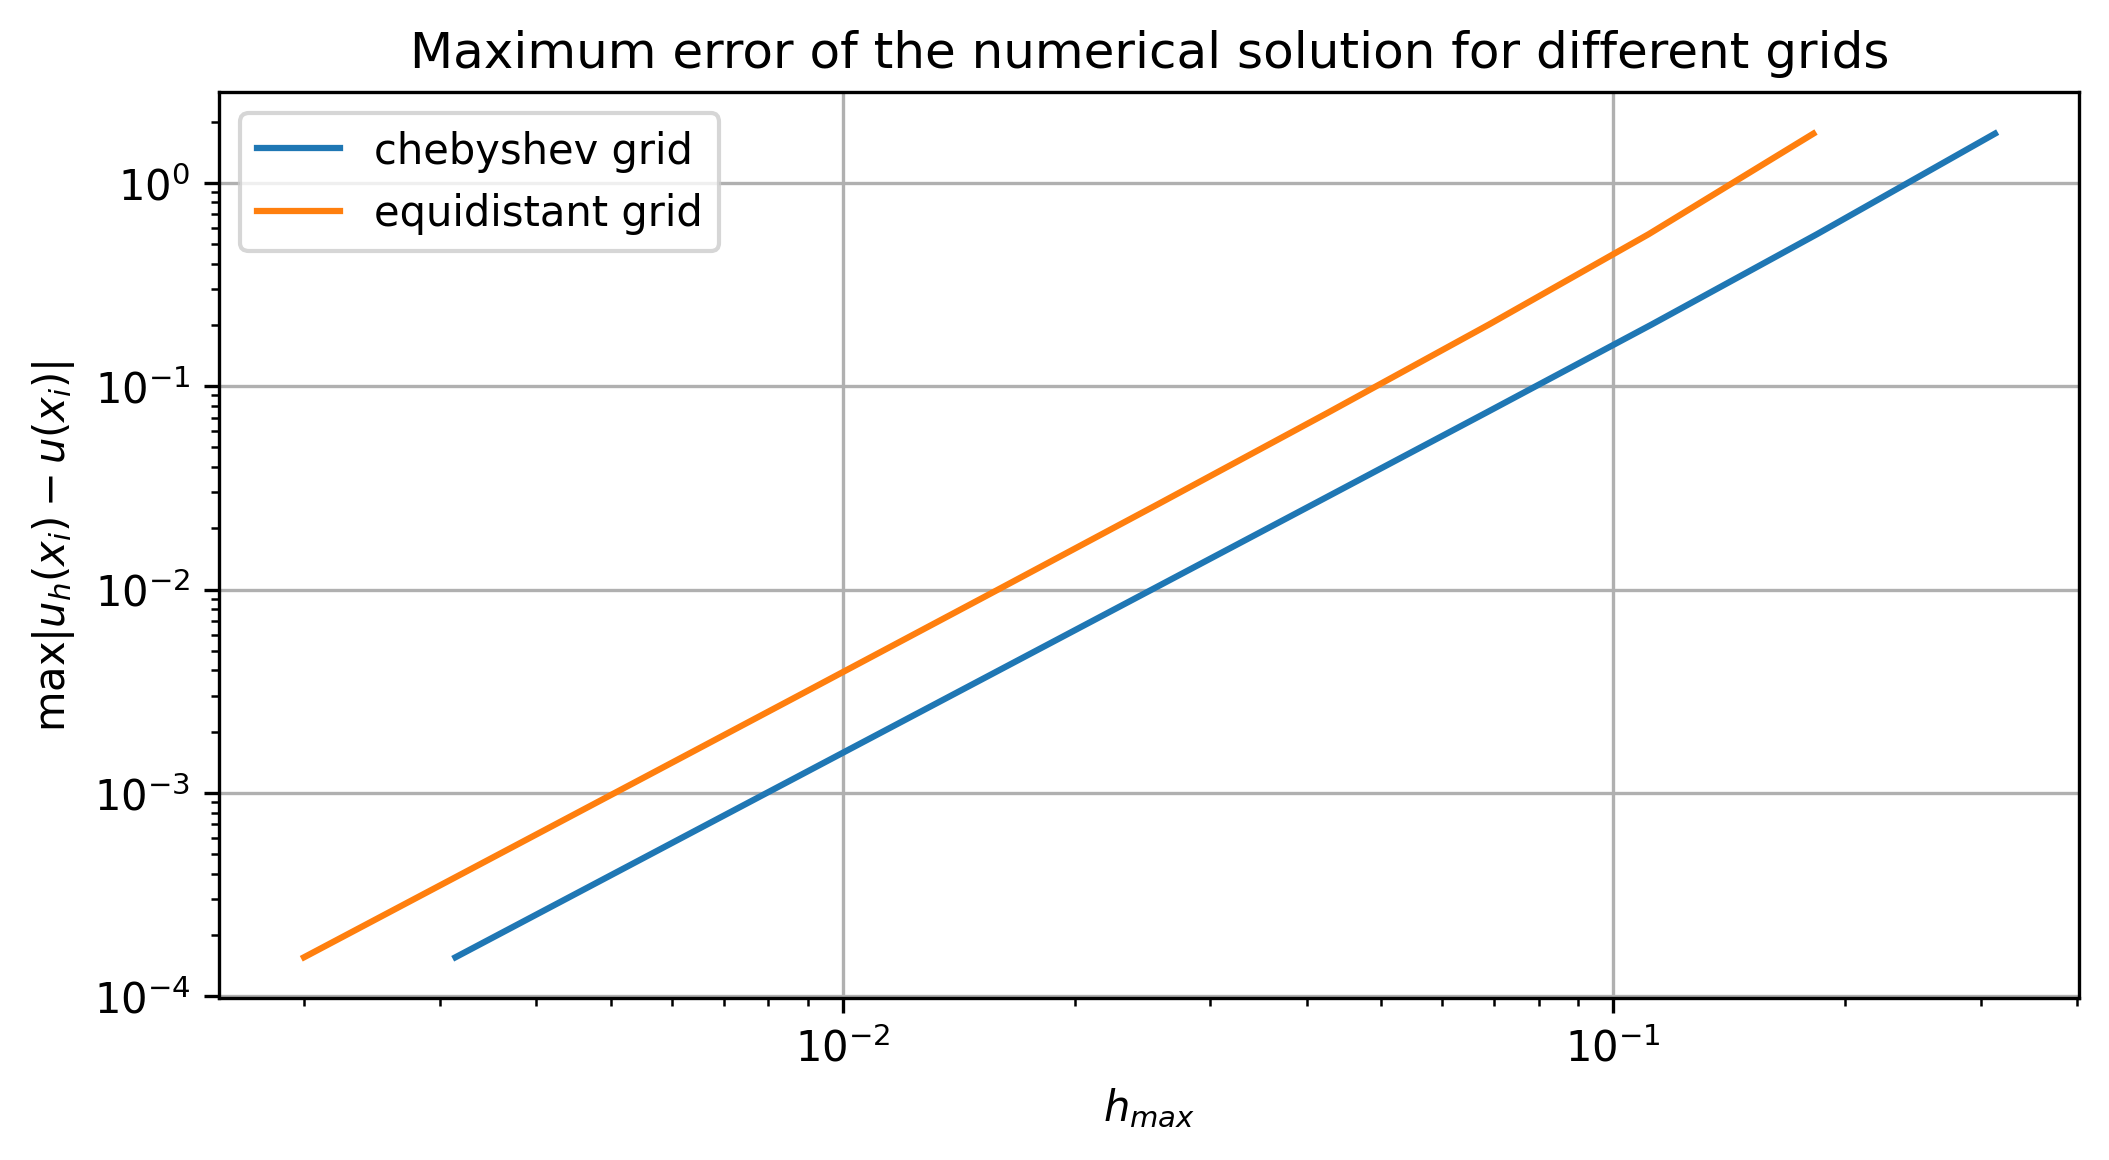

In [2]:
def get_error( x ):
    L,f = get_bvp(x)
    sol = sp.sparse.linalg.spsolve(L,f)
    e_max = np.max(np.abs(sol-u(x[1:-1])))
    h_max = np.max(np.hstack((x[1:-1]-x[:-2],x[-1]-x[-2])))
    return e_max, h_max

num_sizes = 10


N = np.round(np.logspace(1,3,10))#!!! make sure to make natural numbers why??

e_cheb = np.zeros(len(N))
h_cheb = np.zeros(len(N))
e_eq = np.zeros(len(N))
h_eq = np.zeros(len(N))

i = 0

for n in N:
    x_eq = -1 + (2*np.arange(n+2))/(n+1)
    x_cheb = get_chebycheff(n)
    
    e_cheb[i],h_cheb[i] = get_error(x_cheb)
    e_eq[i],h_eq[i] = get_error(x_eq)
    
    i+=1
    
plt.figure(figsize = (8,4),dpi = 300)
plt.loglog(h_cheb,e_cheb,label = "chebyshev grid")
plt.loglog(h_eq,e_cheb, label = "equidistant grid")
plt.xlabel("$h_{max}$")
plt.ylabel("max$|u_h(x_i)-u(x_i)|$")
plt.legend()
plt.title("Maximum error of the numerical solution for different grids")
plt.grid()
plt.show()

# Do the plotting here